## In this notebook, We will import, manipulate, visualize and forecast potato price data.  We'll also wrap our analysis into functions to make it easy to analyze prices of other foods.

In [3]:
# Load the readr and dplyr packages
library(readr)
library(dplyr)

potato_prices <- read_csv(
  "datasets/Potatoes (Irish).csv",
  col_types = cols_only(
    adm1_name = col_character(),
    mkt_name = col_character(),
    cm_name = col_character(),
    mp_month = col_integer(),
    mp_year = col_integer(),
    mp_price = col_double()
  )
)

# Rename the columns to be more informative
potato_prices_renamed <- potato_prices %>% 
  rename(region = adm1_name, 
    market = mkt_name,
    commodity_kg = cm_name,
    month = mp_month,
    year = mp_year,
    price_rwf = mp_price
  )

# Check the result
glimpse(potato_prices_renamed)
head(potato_prices_renamed)

Rows: 4,320
Columns: 6
$ region       <chr> "$West/Iburengerazuba", "$West/Iburengerazuba", "$West...
$ market       <chr> "Birambo", "Birambo", "Birambo", "Birambo", "Birambo",...
$ commodity_kg <chr> "Potatoes (Irish)", "Potatoes (Irish)", "Potatoes (Iri...
$ month        <int> 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3...
$ year         <int> 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, ...
$ price_rwf    <dbl> 157.0000, 133.3333, 96.5000, 97.0000, 107.8000, 125.50...


region,market,commodity_kg,month,year,price_rwf
$West/Iburengerazuba,Birambo,Potatoes (Irish),11,2010,157.0000
$West/Iburengerazuba,Birambo,Potatoes (Irish),12,2010,133.3333
$West/Iburengerazuba,Birambo,Potatoes (Irish),1,2011,96.5000
$West/Iburengerazuba,Birambo,Potatoes (Irish),2,2011,97.0000
$West/Iburengerazuba,Birambo,Potatoes (Irish),3,2011,107.8000
$West/Iburengerazuba,Birambo,Potatoes (Irish),4,2011,125.5000


In [8]:
# Cleaning
# install.packages('lubridate')
library(lubridate)

# Convert year and month to Date
potato_prices_cleaned <- potato_prices_renamed %>% 
  mutate(date = ymd(paste(year, month, "01"))
  ) %>% 
  select(-month, -year)

# See the result
glimpse(potato_prices_cleaned)
head(potato_prices_cleaned)

Rows: 4,320
Columns: 5
$ region       <chr> "$West/Iburengerazuba", "$West/Iburengerazuba", "$West...
$ market       <chr> "Birambo", "Birambo", "Birambo", "Birambo", "Birambo",...
$ commodity_kg <chr> "Potatoes (Irish)", "Potatoes (Irish)", "Potatoes (Iri...
$ price_rwf    <dbl> 157.0000, 133.3333, 96.5000, 97.0000, 107.8000, 125.50...
$ date         <date> 2010-11-01, 2010-12-01, 2011-01-01, 2011-02-01, 2011-...


region,market,commodity_kg,price_rwf,date
$West/Iburengerazuba,Birambo,Potatoes (Irish),157.0000,2010-11-01
$West/Iburengerazuba,Birambo,Potatoes (Irish),133.3333,2010-12-01
$West/Iburengerazuba,Birambo,Potatoes (Irish),96.5000,2011-01-01
$West/Iburengerazuba,Birambo,Potatoes (Irish),97.0000,2011-02-01
$West/Iburengerazuba,Birambo,Potatoes (Irish),107.8000,2011-03-01
$West/Iburengerazuba,Birambo,Potatoes (Irish),125.5000,2011-04-01


In [9]:
# Wrap this code into a function [Note] potatoes are not a balanced diet
read_price_data <- function(commodity) {
  data_file <- paste0("datasets/", commodity, ".csv")
  prices <- read_csv(
    data_file,
    col_types = cols_only(
      adm1_name = col_character(),
      mkt_name = col_character(),
      cm_name = col_character(),
      mp_month = col_integer(),
      mp_year = col_integer(),
      mp_price = col_double()
    )
  )
  
  prices_renamed <- prices %>% 
    rename(
      region = adm1_name, 
      market = mkt_name,
      commodity_kg = cm_name,
      month = mp_month,
      year = mp_year,
      price_rwf = mp_price
    )
    
  prices_renamed %>% 
    mutate(
      date = ymd(paste(year, month, "01"))
    ) %>% 
    select(-month, -year)
}

# Test it
pea_prices <- read_price_data("Peas (fresh)")
glimpse(pea_prices)
head(pea_prices)

Rows: 1,893
Columns: 5
$ region       <chr> "$West/Iburengerazuba", "$West/Iburengerazuba", "$West...
$ market       <chr> "Birambo", "Birambo", "Birambo", "Birambo", "Birambo",...
$ commodity_kg <chr> "Peas (fresh)", "Peas (fresh)", "Peas (fresh)", "Peas ...
$ price_rwf    <dbl> 403.5000, 380.0000, 277.5000, 450.0000, 450.0000, 375....
$ date         <date> 2011-01-01, 2011-02-01, 2011-04-01, 2011-05-01, 2011-...


region,market,commodity_kg,price_rwf,date
$West/Iburengerazuba,Birambo,Peas (fresh),403.5,2011-01-01
$West/Iburengerazuba,Birambo,Peas (fresh),380.0,2011-02-01
$West/Iburengerazuba,Birambo,Peas (fresh),277.5,2011-04-01
$West/Iburengerazuba,Birambo,Peas (fresh),450.0,2011-05-01
$West/Iburengerazuba,Birambo,Peas (fresh),450.0,2011-06-01
$West/Iburengerazuba,Birambo,Peas (fresh),375.0,2011-09-01


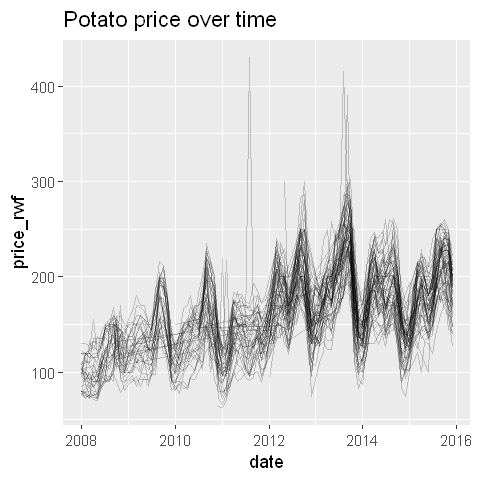

In [25]:
# Load ggplot2
library(ggplot2)

# Draw a line plot of price vs. date grouped by market 
potato_prices_cleaned %>% 
  ggplot(aes(date, price_rwf, group = market)) +
  geom_line(alpha = 0.2) +
  ggtitle("Potato price over time")
options(repr.plot.width = 4, repr.plot.height = 4)

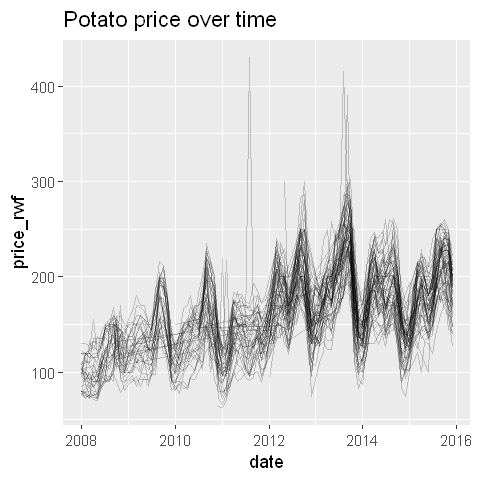

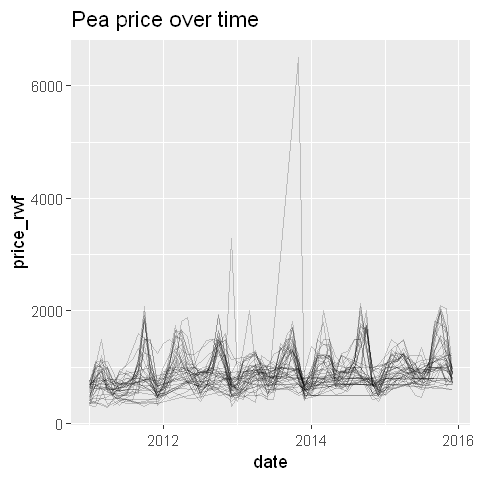

In [27]:
# Wrap this code into a function
potato_prices_cleaned %>% 
  ggplot(aes(date, price_rwf, group = market)) +
  geom_line(alpha = 0.2) +
  ggtitle("Potato price over time")

# Try the function on the pea data
plot_price_vs_time <- function(prices, commodity) {
  prices %>% 
    ggplot(aes(date, price_rwf, group = market)) +
    geom_line(alpha = 0.2) +
    ggtitle(paste(commodity, "price over time"))
}
plot_price_vs_time(pea_prices, "Pea")
options(repr.plot.width = 4, repr.plot.height = 4)

## Data preprocession for forecast

In [36]:
# Group by date, and calculate the median price
potato_prices_summarized <- potato_prices_cleaned %>%
  group_by(date) %>% 
  summarize(median_price_rwf = median(price_rwf), .groups = 'drop')

# See the result
head(potato_prices_summarized)

date,median_price_rwf
2008-01-01,97.50
2008-02-01,100.00
2008-03-01,95.00
2008-04-01,96.25
2008-05-01,95.00
2008-06-01,110.00


In [49]:
# Load magrittr
# install.packages('magrittr')
library(magrittr)

# Extract a time series
potato_time_series <- potato_prices_summarized %$% 
  ts(median_price_rwf, 
    start = c(year(min(date)), month(min(date))), 
    end   = c(year(max(date)), month(max(date))), 
    frequency = 12
  )

# See the result
potato_time_series

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,97.5000,100.0000,95.0000,96.2500,95.0000,110.0000,116.6667,125.0000,136.2500,130.0000,127.5000,114.3750
2009,120.0000,122.5000,130.0000,131.2500,135.0000,124.3125,125.8333,144.2500,181.2500,170.0000,150.2500,112.0000
2010,109.6875,113.5000,131.2500,132.0833,140.4167,147.3750,142.5000,161.5000,182.4000,162.5000,151.5000,122.5000
2011,105.7000,108.1750,118.8750,145.0143,148.6667,148.0500,137.4048,137.2619,141.6667,144.2000,133.1750,141.5000
2012,150.7500,175.2500,186.0139,186.2500,182.5000,162.7500,179.1250,196.9643,226.5000,203.5000,169.2500,144.0000
2013,154.3333,157.0000,171.2500,187.5000,177.0000,202.2500,210.0000,233.1875,241.3333,237.5000,176.7083,140.0000
2014,138.3333,158.7500,186.2500,198.2500,191.0000,189.3333,182.5000,187.6191,200.0000,183.1309,150.0000,133.9286
2015,136.2500,157.6071,178.0000,190.2778,179.3750,168.3333,180.0000,202.1250,223.5000,217.5000,216.1250,190.0000


In [48]:
# Wrap this code into a function
create_price_time_series <- function(prices) {
  prices_summarized <- prices %>%
    group_by(date) %>% 
    summarize(median_price_rwf = median(price_rwf), .groups = 'drop')
  
  prices_summarized %$% 
    ts(median_price_rwf, 
      start = c(year(min(date)), month(min(date))), 
      end   = c(year(max(date)), month(max(date))), 
      frequency = 12)
}

# Try the function on the pea data
pea_time_series <- create_price_time_series(pea_prices)
pea_time_series

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2011,561.6667,700.0000,958.0000,710.0000,591.5000,597.8572,666.3572,758.5000,938.8333,1506.2500,787.5000,548.9375
2012,655.0000,950.0000,1272.1667,1166.0000,945.8750,822.3333,714.2857,788.1250,990.7222,1413.7500,964.2619,661.8571
2013,668.7500,781.6334,829.9875,975.0000,908.2500,789.9444,806.8000,1000.0000,1162.4583,1316.7500,916.6667,623.8571
2014,695.5000,1025.0000,1166.6250,1083.2500,825.0000,816.6667,809.5714,1000.0000,1000.0000,1666.6667,700.0000,633.3333
2015,800.0000,1066.6667,1100.0000,1051.8889,950.0000,873.6667,804.1250,900.0000,1166.6667,1550.0000,1066.6667,802.1250


         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 2016       190.0093 171.35706 208.6615 161.48317 218.5354
Feb 2016       202.6099 174.14582 231.0740 159.07783 246.1420
Mar 2016       220.0317 181.72222 258.3413 161.44238 278.6211
Apr 2016       231.5932 184.48380 278.7026 159.54559 303.6408
May 2016       226.2626 174.20438 278.3209 146.64641 305.8789
Jun 2016       229.1587 170.73454 287.5829 139.80665 318.5108
Jul 2016       230.8787 166.57270 295.1848 132.53113 329.2263
Aug 2016       251.1739 175.53815 326.8096 135.49902 366.8487
Sep 2016       279.3573 189.13187 369.5827 141.36943 417.3451
Oct 2016       262.7887 172.33073 353.2467 124.44516 401.1323
Nov 2016       236.0485 149.89274 322.2042 104.28465 367.8123
Dec 2016       205.0924 126.05584 284.1290  84.21640 325.9684
Jan 2017       205.0036 121.88813 288.1190  77.88948 332.1177
Feb 2017       218.4941 125.58323 311.4050  76.39917 360.5891
Mar 2017       237.1698 131.67270 342.6669  75.82591 398.5137
Apr 2017

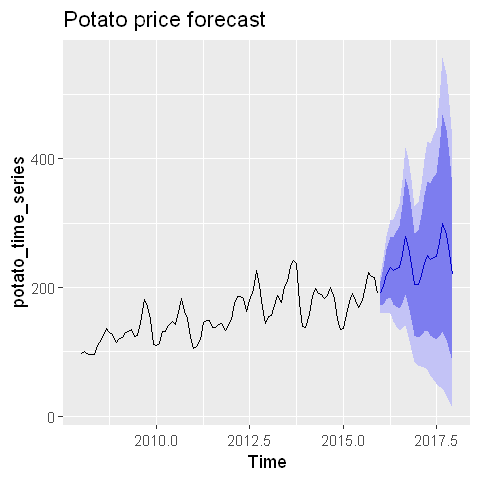

In [42]:
# Load forecast
# install.packages('forecast')
library(forecast)

# Forecast the potato time series
potato_price_forecast <- forecast(potato_time_series)

# View it
potato_price_forecast

# Plot the forecast
autoplot(potato_price_forecast, main = "Potato price forecast")

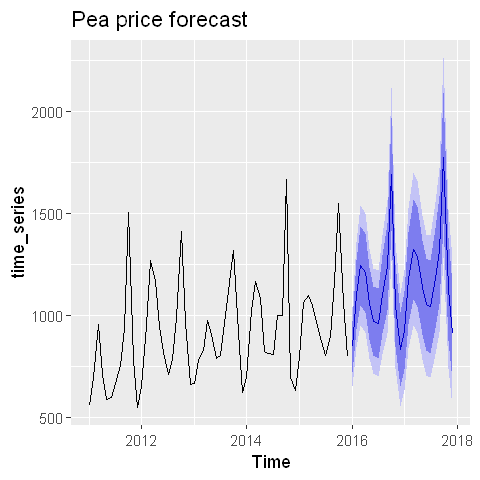

In [43]:
# Wrap the code into a function
plot_price_forecast <- function(time_series, commodity) {
  price_forecast <- forecast(time_series)
  autoplot(price_forecast, main = paste(commodity, "price forecast")) 
}

# Try the function on the pea data
plot_price_forecast(pea_time_series, "Pea")

## Wrap all the code in to forecasting functions

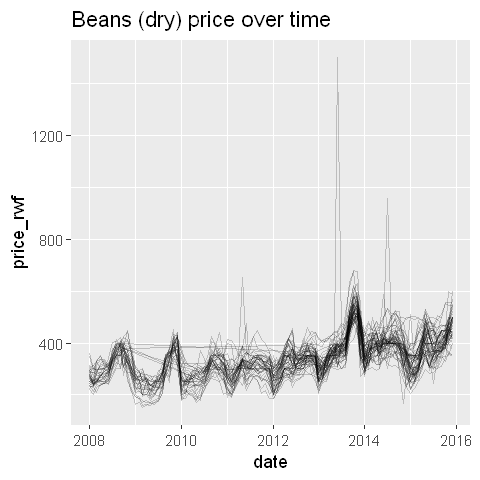

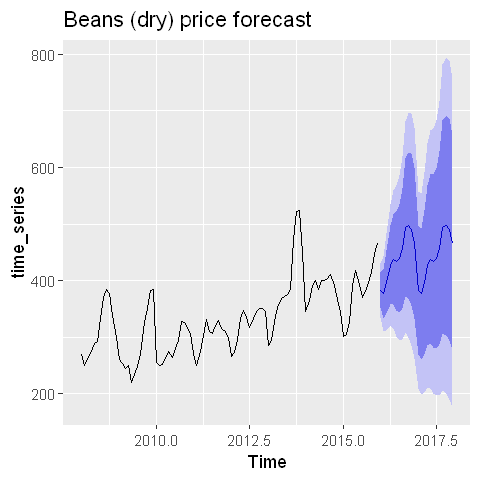

In [45]:
# Choose dry beans as the commodity
commodity <- "Beans (dry)"

# Read the price data
bean_prices <- read_price_data(commodity)

# Plot price vs. time
plot_price_vs_time(bean_prices, commodity)

# Create a price time series
bean_time_series <- create_price_time_series(bean_prices)

# Plot the price forecast
plot_price_forecast(bean_time_series, commodity)